実装にあたってこちらの記事を参考にさせていただきました  
[Zenn 歩行時の加速度,角速度データから歩行軌跡を描いてみた - Beyond Toyama](https://zenn.dev/happy663/articles/1a0abc285b3a33)

# 事前準備

## ライブラリのインポート

In [13]:
%pip install japanize_matplotlib
%pip install pandas
%pip install scipy


Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib
import numpy as np
from scipy import signal
from scipy.signal import find_peaks
from io import StringIO
import datetime
import hashlib

## センサデータの取得

In [28]:
# acc_file_path = "https://raw.githubusercontent.com/kanakanho/kajilab-PDR/main/data/acc.csv"
# gyro_file_path = "https://raw.githubusercontent.com/kanakanho/kajilab-PDR/main/data/gyro.csv"

# # 通信してデータを取得
# df_acc = pd.read_csv(acc_file_path)
# df_gyro = pd.read_csv(gyro_file_path)

# センサデータの加工

## ウィンドウの宣言

In [9]:
window_acc = 400
window_pre = 240
window_gayo = 200
shift_amount = window_pre * -1

## データの描画

### 電波の表示

CSVファイルを読み取る

In [11]:
# data = """time,mac_address,service_uuid,rssi
# 11:27:11,11-22-33-44-55-66,0d7e93aa-563a-4feb-8635-ed9ed29c6c00,-45
# 11:27:12,A1-BB-CB-FE-5A-6B,9f8274e5-8772-4f90-b1f1-1355d98d82f6,-34
# 11:27:12,B1-CC-FF-FA-1A-3B,3cb5a2b2-42fc-42cb-b1c4-2098313537ed,-78
# 11:27:12,FF-AB-1F-FB-34-54,7cf23107-156a-4127-b618-0ffe56fdee44,-90
# 11:27:19,11-22-33-44-55-66,0d7e93aa-563a-4feb-8635-ed9ed29c6c00,-47
# 11:27:20,A1-BB-CB-FE-5A-6B,9f8274e5-8772-4f90-b1f1-1355d98d82f6,-31
# 11:27:20,B1-CC-FF-FA-1A-3B,3cb5a2b2-42fc-42cb-b1c4-2098313537ed,-67
# 11:27:46,A1-BB-CB-FE-5A-6B,9f8274e5-8772-4f90-b1f1-1355d98d82f6,-34
# 11:27:46,B1-CC-FF-FA-1A-3B,3cb5a2b2-42fc-42cb-b1c4-2098313537ed,-81
# 11:27:56,11-22-33-44-55-66,0d7e93aa-563a-4feb-8635-ed9ed29c6c00,-49
# """

# # データをDataFrameとして読み込む
# df = pd.read_csv(StringIO(data))

# # timeをdatetime型に変換（時間順に並べるため）
# df['time'] = pd.to_datetime(df['time'], format='%H:%M:%S')

file_path_advertise = 'data/advertisedata0213.csv'
# CSVファイルを読み込む
df = pd.read_csv(file_path_advertise)
# timeをdatetime型に変換（時間順に並べるため）
df['time'] = pd.to_datetime(df['time'], format='%H:%M:%S')

フィルターをかける

In [72]:
# service_uuidが指定の値のデータだけを抽出
target_uuid = "4c000c0e00dcdf7a77b39324fa462f5eb6551006491d614bd9581a"
# filtered_df = df[df['service_uuid'] == target_uuid]
filtered_df = df[df['service_uuid'].apply(lambda x: len(x) == 49)]

グラフを描画する

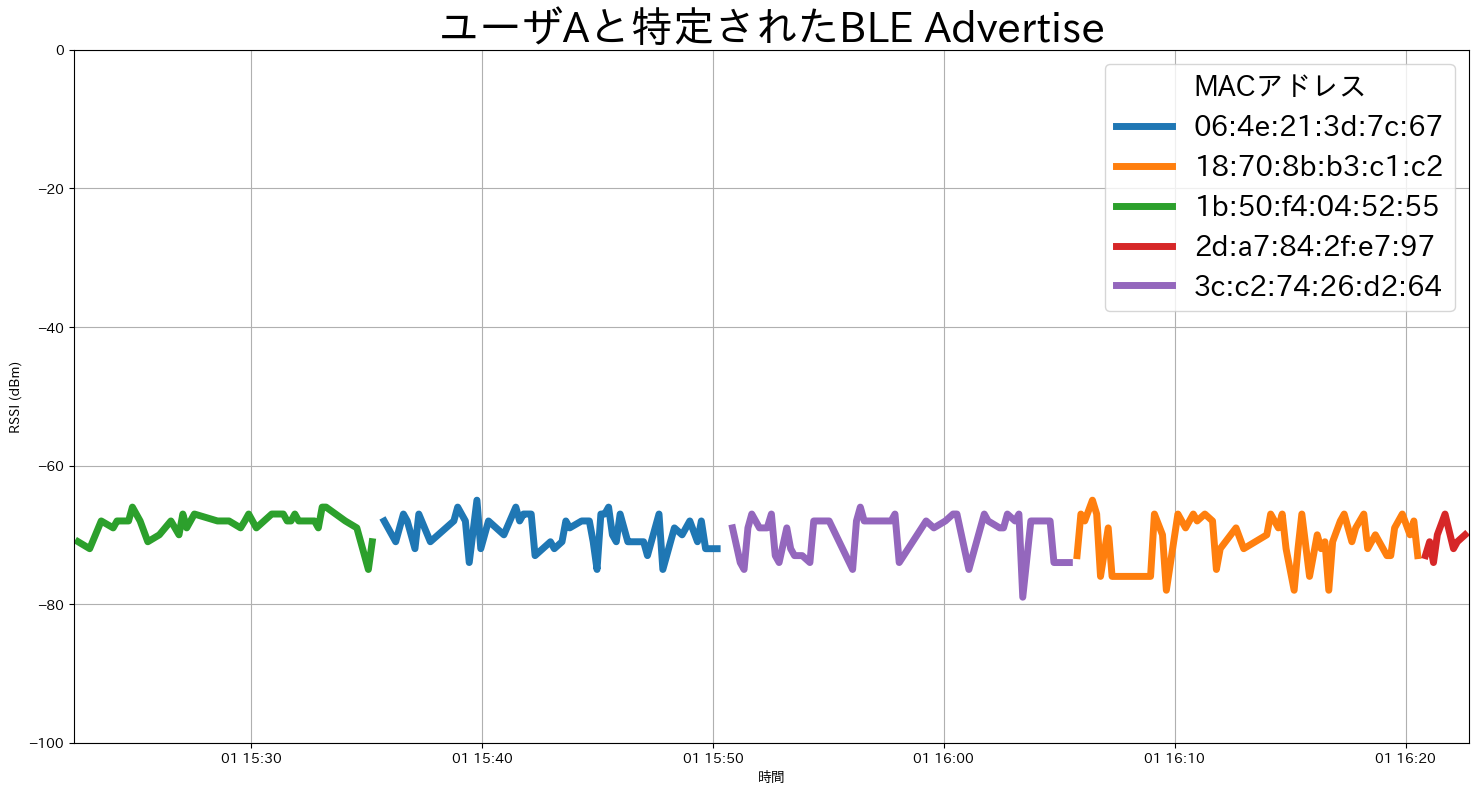

In [ ]:
# グラフの描画
fig = plt.figure(figsize=(18, 9))

# MACアドレスごとにグループ化してプロット
# # 50件だけプロット
# for i, (mac, group) in enumerate(df.groupby('mac_address')):
#     if i >= 50:
#         break
#     plt.plot(group['time'], group['rssi'], label=mac, linewidth=1)
for mac, group in filtered_df.groupby('mac_address'):
    plt.plot(group['time'], group['rssi'], label=mac, marker='o', linewidth=3, markersize=6)


# プライベートビーコンの場合
# elif (len(valueText) == 36):
#     try:
#         head_value = int(valueText[:2], 16)
#         if(head_value > 63 and head_value < 128):
#             submit_uuid = valueText[0:8] + valueText[9:13] + valueText[14:18] + valueText[19:23] + valueText[24:36]
#             # sent_datas.append(
#             #     {'uuid': submit_uuid, 'rssi': int(dev.rssi)}
#             # )
#             print("プライバシービーコン")
#             print(submit_uuid)

# グラフの設定
plt.ylim(-100,0)
start_time = datetime.datetime.strptime("15:22:20", "%H:%M:%S")
end_time = datetime.datetime.strptime("16:22:44", "%H:%M:%S")
plt.xlim(start_time, end_time)

# グラフの装飾
plt.xlabel('時間')
plt.ylabel('RSSI (dBm)')
# plt.title('RSSIの時系列変化')
plt.title('ユーザAと特定されたBLE Advertise', fontsize=30)
plt.grid(True)
plt.legend(title='MACアドレス', fontsize=20, title_fontsize=20)

# 表示
plt.show()

# 保存
fig.savefig('out/graph2.png')

### 性能評価

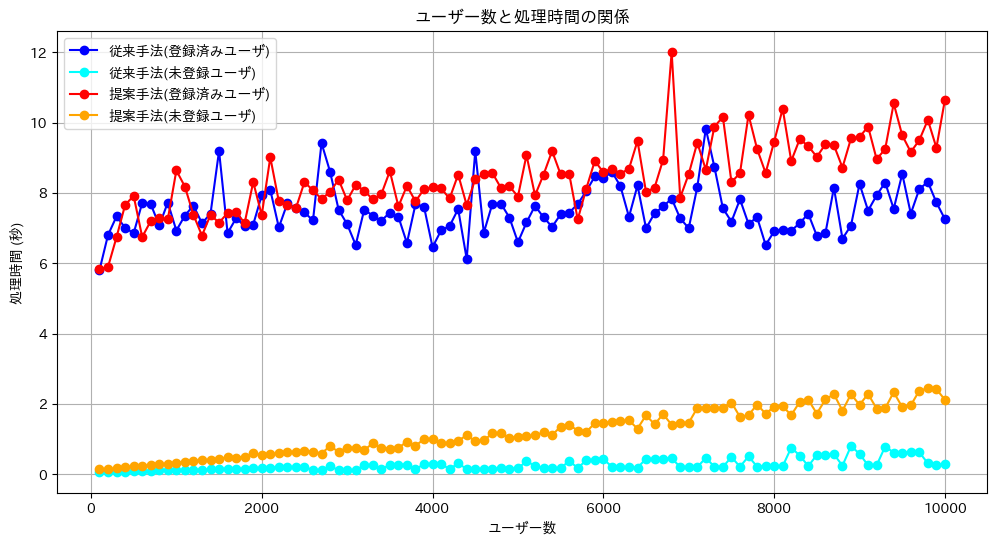

<Figure size 640x480 with 0 Axes>

In [ ]:
# acc_file_path = "https://raw.githubusercontent.com/kanakanho/kajilab-PDR/main/data/acc.csv"
# gyro_file_path = "https://raw.githubusercontent.com/kanakanho/kajilab-PDR/main/data/gyro.csv"

# # 通信してデータを取得
# df_acc = pd.read_csv(acc_file_path)
# df_gyro = pd.read_csv(gyro_file_path)

# data = pd.read_csv("data/siphash1.csv")

# CSVファイルのパス（例: data.csv）
file_path_siphash = 'data/siphash0224_1-100.csv'
file_path_basic = 'data/basic0225_1-100.csv'
# CSVファイルを読み込む
df_basic = pd.read_csv(file_path_basic)
df_siphash = pd.read_csv(file_path_siphash)

# RegisterdとNonRegisterdのデータを抽出
basic_reg = df_basic[df_basic["user_state"] == "Registerd"]
basic_nonreg = df_basic[df_basic["user_state"] == "NonRegisterd"]
siphash_reg = df_siphash[df_siphash["user_state"] == "Registerd"]
siphash_nonreg = df_siphash[df_siphash["user_state"] == "NonRegisterd"]

# データをDataFrameとして読み込む
# df = pd.read_csv(StringIO(data))

# 折れ線グラフの描画
fig = plt.figure(figsize=(12, 6))
plt.plot(basic_reg["users"], basic_reg["time"], marker='o', linestyle='-', label="従来手法(登録済みユーザ)", color='blue')
plt.plot(basic_nonreg["users"], basic_nonreg["time"], marker='o', linestyle='-', label="従来手法(未登録ユーザ)", color='cyan')
plt.plot(siphash_reg["users"], siphash_reg["time"], marker='o', linestyle='-', label="提案手法(登録済みユーザ)", color='red')
plt.plot(siphash_nonreg["users"], siphash_nonreg["time"], marker='o', linestyle='-', label="提案手法(未登録ユーザ)", color='orange')

# plt.plot(df_basic['users'], df_basic['time'], linestyle='-', color='r', label='既存手法')
# plt.plot(df_siphash['users'], df_siphash['time'], marker='o', linestyle='-', color='b', label='提案手法')

# グラフの装飾
plt.xlabel('ユーザー数')
plt.ylabel('処理時間 (秒)')
plt.title('ユーザー数と処理時間の関係')
plt.grid(True)
plt.legend()

# 表示
plt.show()

# 保存
fig.savefig('out/benchgraph.png')